# Contexto

###Prepare um dataset que será utilizado para classificação de Churn (Quando um cliente deixa utilizar um serviço da empresa).

###O dataset utilizado é proveniente de uma empresa fictícia de telefonia, criado e disponibilizado pela IBM para fins didáticos.

###O dicionário com as descrições das features pode ser encontrado [neste link no Kaggle](https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset).

# Settings

## Libraries

In [1]:
!pip install pandas-profiling==3.3.0
#Atualiza a biblioteca para versão mais nova.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.0/268.0 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 20.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 8.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=f51354291cd8f4bc4fe00b5d5dea9c4bcfacac488f007cda71d1881b2410b543
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfe

In [2]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import scale, StandardScaler, OneHotEncoder, OrdinalEncoder

In [3]:
from sklearn import set_config
set_config(display='diagram')

## Load data


In [4]:
df = pd.read_excel('https://public.dhe.ibm.com/software/data/sw-library/cognos/mobile/C11/data/Telco_customer_churn.xlsx', index_col=0)
display(df)

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
CustomerID,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN


# EDA

In [5]:
ProfileReport(df)

Output hidden; open in https://colab.research.google.com to view.

In [6]:
#Vericando se tem linhas duplicadas, e nesse caso não tem.
df.duplicated().sum().any()

False

In [7]:
#Verificando se tem valores faltantes.
df.isna().sum()

Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [8]:
# Nos valores faltantes acima tinha no churn reason, e nessa linha ele pesquisa mais sobre.
df[df['Churn Reason'].isna()]['Churn Label'].value_counts()

No    5174
Name: Churn Label, dtype: int64

In [9]:
# Possui 3 colunas de churn e todas as 3 meio que dizem a mesma coisa.
df.filter(like='Churn')

,Churn Label,Churn Value,Churn Score,Churn Reason
CustomerID,,,,
3668-QPYBK,Yes,1,86,Competitor made better offer
9237-HQITU,Yes,1,67,Moved
9305-CDSKC,Yes,1,86,Moved
7892-POOKP,Yes,1,84,Moved
0280-XJGEX,Yes,1,89,Competitor had better devices
...,...,...,...,...
2569-WGERO,No,0,45,NaN
6840-RESVB,No,0,59,NaN
2234-XADUH,No,0,71,NaN


In [10]:
# Drop churn columns, aqui ele vai ignorar alguma valor.
df.drop(columns=['Churn Label', 'Churn Score', 'Churn Reason'], inplace=True)

In [11]:
# Tem colunas constantes também. e o nunique () sozinho mostra as categorias com valores unicos
constant_cols = df.columns[df.nunique()==1]
df.drop(columns=constant_cols, inplace=True)

In [12]:
geographic_cols2drop = ['City', 'Zip Code', 'Lat Long']
df.drop(columns=geographic_cols2drop, inplace=True)

In [13]:
df.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV
CustomerID,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,3239
9237-HQITU,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,2701
9305-CDSKC,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1,5372
7892-POOKP,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,5003
0280-XJGEX,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1,5340


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 3668-QPYBK to 3186-AJIEK
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Latitude           7043 non-null   float64
 1   Longitude          7043 non-null   float64
 2   Gender             7043 non-null   object 
 3   Senior Citizen     7043 non-null   object 
 4   Partner            7043 non-null   object 
 5   Dependents         7043 non-null   object 
 6   Tenure Months      7043 non-null   int64  
 7   Phone Service      7043 non-null   object 
 8   Multiple Lines     7043 non-null   object 
 9   Internet Service   7043 non-null   object 
 10  Online Security    7043 non-null   object 
 11  Online Backup      7043 non-null   object 
 12  Device Protection  7043 non-null   object 
 13  Tech Support       7043 non-null   object 
 14  Streaming TV       7043 non-null   object 
 15  Streaming Movies   7043 non-null   object 
 16  Contract      

In [15]:
str_idx = df['Total Charges'].map(lambda x: isinstance(x, str))
int_idx = df['Total Charges'].map(lambda x: isinstance(x, int))

df.loc[int_idx, 'Total Charges'] = df.loc[int_idx, 'Total Charges'].astype(float)
df.loc[str_idx, 'Total Charges'] = 0

In [16]:
df['Total Charges'] = df['Total Charges'].astype(float)

In [17]:
df.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV
CustomerID,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,3239
9237-HQITU,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,2701
9305-CDSKC,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,5372
7892-POOKP,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,5003
0280-XJGEX,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,5340


In [18]:
df[df['Total Charges']==0]

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV
CustomerID,,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,34.084909,-117.258107,Female,No,Yes,No,0,No,No phone service,DSL,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,0,2578
3115-CZMZD,36.869584,-118.189241,Male,No,No,No,0,Yes,No,No,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,0,5504
5709-LVOEQ,37.590421,-122.306467,Female,No,Yes,No,0,Yes,No,DSL,...,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,0,2048
4367-NUYAO,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,0,4950
1371-DWPAZ,40.363446,-123.835041,Female,No,Yes,No,0,No,No phone service,DSL,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,0,4740
7644-OMVMY,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,0,2019
3213-VVOLG,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,0,2299
2520-SGTTA,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,0,3763
2923-ARZLG,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,0,4890


In [19]:
df = df[df['Total Charges']!=0]

In [20]:
df.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,CLTV
CustomerID,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,3239
9237-HQITU,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,2701
9305-CDSKC,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,5372
7892-POOKP,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,5003
0280-XJGEX,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,5340


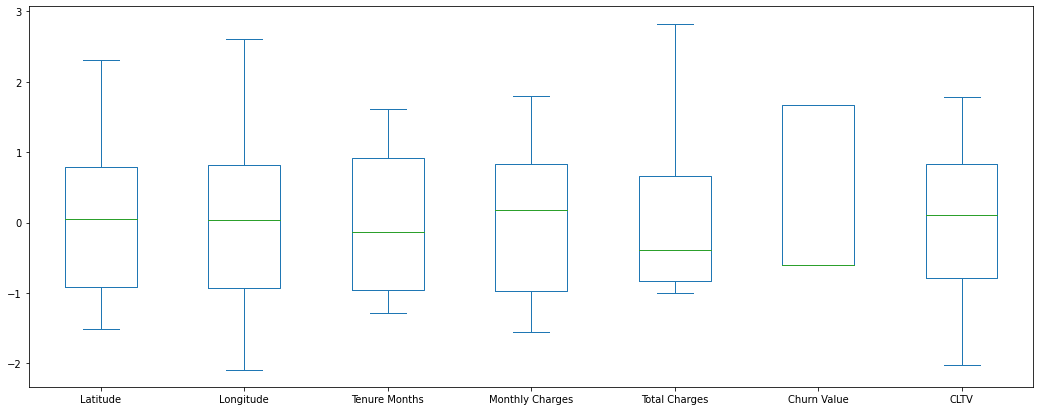

In [21]:
# Não tem outliers que são esses dados que estão muito extremos
numeric_cols = df.select_dtypes('number').columns

df[numeric_cols].apply(scale).plot.box(figsize=(18,7));

In [22]:
df_features = df.drop(columns='Churn Value')
target = df['Churn Value']

In [23]:
numerical_cols = df_features.select_dtypes('number').columns
categorical_cols = df_features.select_dtypes(exclude='number').columns

In [24]:
preprocessing = ColumnTransformer([
    ('numerical_preprocessing', StandardScaler(), numerical_cols),
    ('categorical_preprocessing', OneHotEncoder(), categorical_cols)
])

preprocessing

ColumnTransformer(transformers=[('numerical_preprocessing', StandardScaler(),
                                 Index(['Latitude', 'Longitude', 'Tenure Months', 'Monthly Charges',
       'Total Charges', 'CLTV'],
      dtype='object')),
                                ('categorical_preprocessing', OneHotEncoder(),
                                 Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'],
      dtype='object'))])

In [25]:
def preprocessing(df):
  # ...
  pass

In [26]:
df_features

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV
CustomerID,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,3239
9237-HQITU,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,2701
9305-CDSKC,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,5372
7892-POOKP,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,5003
0280-XJGEX,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,5340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569-WGERO,34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,5306
6840-RESVB,34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,2140
2234-XADUH,34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,5560


In [29]:
preprocessing.fit(df_features);

AttributeError: ignored

In [ ]:
pd.DataFrame(
    data=preprocessing.transform(df_features),
    columns=preprocessing.get_feature_names_out()
)

In [ ]:
df_mi = df.copy()

encoder = OrdinalEncoder()
df_mi[categorical_cols] = encoder.fit_transform(df_mi[categorical_cols]).astype(int)
df_mi.head()

In [30]:
from sklearn.feature_selection import mutual_info_classif

In [31]:
df_features = df_mi.drop(columns='Churn Value')
target = df_mi['Churn Value']

NameError: ignored

In [ ]:
discrete_cols = df_features.dtypes==int

mi_scores = mutual_info_classif(X=df_features, y=target, discrete_features=discrete_cols)
mi_scores

In [ ]:
fig,ax = plt.subplots()
fig.set_f

In [ ]:
pd.Series(mi_scores, index=df_features.columns).sort_values().plot.barh(figsize=(12,8))
plt.xlabel('MI Scores')
plt.show()

In [ ]:
df_features